In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [2]:
dados = pd.read_csv('2004-2019.tsv', sep = '\t')

# Exploração dos dados

In [3]:
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
# vendoos tipo de produto
dados['PRODUTO'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [5]:
#vou usar apenas ooleo diesel
diesel = dados[dados['PRODUTO'] =='ÓLEO DIESEL'].copy()

In [6]:
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


# Garantindo integridade temporal dos dados

In [7]:
#convertendo as datas para datetime
diesel['DATA INICIAL'] = pd.to_datetime(diesel['DATA INICIAL'])
diesel['DATA FINAL'] = pd.to_datetime(diesel['DATA FINAL'])


In [8]:
# garantindo que a data final sempre é maior que a inicial
# para ter certeza da consistência dos dados
(diesel['DATA FINAL'] - diesel['DATA INICIAL']).value_counts()

6 days    21194
dtype: int64

# Criando dataset de treino e valiação

In [9]:
# no geral series temporais tem performances melhores em datas
#próximas de quando o modelo foi treinado, então devemos ver
# a performance em cada ano
diesel_treino = diesel[diesel['DATA FINAL'] < '2011-01-01']
diesel_valid = diesel[diesel['DATA FINAL'] >= '2011-01-01']
diesel_treino.shape, diesel_valid.shape

((9233, 21), (11961, 21))

In [10]:
# criando uma BASELINE
# uma boa baseline de se usar pe o preço anterior, mas se pode usar medias moveis ou medias exponenciais
y_treino = diesel_treino['PREÇO MÉDIO REVENDA']
y_valid = diesel_valid['PREÇO MÉDIO REVENDA']

# Criando uma  Baseline

In [11]:
# como para uma mesma data temos varios estados não podemos simplismente pegar a linha anterior
# se não pegariamos um dado de goias para prever o valor de SP
baseline_treino = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
baseline_valid = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)

# o uso de shift fara com que o preço médio de revenda da semana anterior de cada estado
# estaja alinhado com o preço médio de revenda dessa semana

In [12]:
baseline_treino.isna().sum()

27

In [13]:
diesel_treino['BASELINE'] = baseline_treino

<ipython-input-13-069ec14d0387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_treino['BASELINE'] = baseline_treino


In [14]:
diesel_treino[diesel_treino['ESTADO'] == 'SAO PAULO'].head()
# para um mesmo estado,o preço da semana anterior agora é a baseline da próxima  semana

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,BASELINE
43570,43570,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,ÓLEO DIESEL,3196,R$/l,1.368,0.057,1.210,1.590,0.158,0.042,1.21,0.026,1.141,1.369,0.021,5,2004,NaN
43597,43597,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,ÓLEO DIESEL,3201,R$/l,1.368,0.057,1.239,1.599,0.158,0.042,1.21,0.026,1.125,1.369,0.021,5,2004,1.368
43624,43624,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,ÓLEO DIESEL,3216,R$/l,1.368,0.057,1.220,1.590,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43651,43651,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,ÓLEO DIESEL,3200,R$/l,1.368,0.057,1.220,1.669,0.159,0.042,1.209,0.025,1.125,1.369,0.021,5,2004,1.368
43678,43678,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,ÓLEO DIESEL,3222,R$/l,1.369,0.056,1.220,1.590,0.159,0.041,1.21,0.025,1.125,1.369,0.021,6,2004,1.368


In [15]:
# para medir o erro vai ser usaado a raiz quadrada do erro médio logarítimico
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()],
                             baseline_valid[baseline_valid.notnull()]))

0.008133639513965778

Aqui temos uma aproximaçao do erro percentual, com 0.81% de erro no geral. Agora, tendo uma Baseline e com treino e validação separados podemos começar a fazer nosso primerio modelo



# CRIANDO O MODELO

In [16]:
df_x_treino = pd.DataFrame(index = diesel_treino.index)
df_x_valid = pd.DataFrame(index = diesel_valid.index)

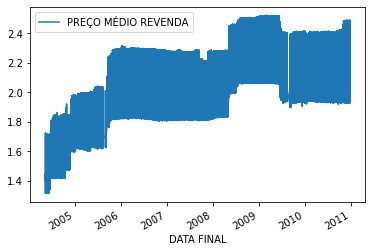

In [17]:
# primerio tem-se aue transformar a variável avo e passar isso pro modelo
# dando uma olhada no prço médio de revenda 
diesel_treino.plot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA')

# Oque é estacionaridade dos dados ?

Perceba que o preço médio não é estacionário, ou seja, ele varia com o tempo ( dados estacionários tem sua média, variancia e valores de correlação entre os dados constantes ao longo do tempo, Sendo assim, é uma série que se
desenvolve aleatoriamente no tempo, em torno de uma média constante, refletindo alguma forma de equilíbrio estatístico estável. Ou seja, as leis de probabilidade que atuam no processo não mudam com o tempo)
Mas é importante ter séries estacionárias em modelos de séries temporais, já que previsõs são baseads em padrões constanes do passado. Métodos de previsão (forecasting) usam transformações matemáticas para “estacionarizar”
uma série e fazer previsões nesta série mais bem comportada, para depois inverter as
transformações e obter as previsões para a série original. Transformações comuns são:
tomar diferenças sucessivamente, deflacionar, aplicar log (p/estabilizar variâncias), fazer
ajustes sazonais

<ipython-input-18-ffe0b0d250f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_treino['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)


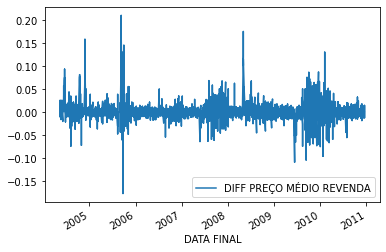

In [18]:
# uma forma simples de transofrmar uma série em estacionária é tirar as diferenças
# em vez de usar os valores absolutos vamos usar a diferença entre os preços

def target_diff(x):
    return x.diff().shift(-1)
diesel_treino['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

diesel_treino.plot(x='DATA FINAL', y= 'DIFF PREÇO MÉDIO REVENDA')

Aqui fica nítido como temos dados mais estáveis, como a média de variação de um dia para o outro orbitando o valor de 0.
Mas essa série ainda não é estacionária, já que esta claro que a varinaça ainda muda um pouco ao longo do tempo.

# Aplicando estacionaridade no x_treino e x_valid

In [19]:
df_x_treino['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA'] =  diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_x_valid['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA'] =  diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

# Criando variáveis que determinarão a variável alvo

Variáveis sazonais: variaveis que esperamos que a série tenha um comportamento parecido em um mesmo periodo de tempo

In [20]:
df_x_treino['MES'] = diesel_treino['DATA FINAL'].dt.month
df_x_treino['DIA'] = diesel_treino['DATA FINAL'].dt.day
df_x_treino['DIA DA SEMANA'] = diesel_treino['DATA FINAL'].dt.weekday
df_x_treino['DIA DO ANO'] = diesel_treino['DATA FINAL'].dt.dayofyear

df_x_valid['MES'] = diesel_valid['DATA FINAL'].dt.month
df_x_valid['DIA'] = diesel_valid['DATA FINAL'].dt.day
df_x_valid['DIA DA SEMANA'] = diesel_valid['DATA FINAL'].dt.weekday
df_x_valid['DIA DO ANO'] = diesel_valid['DATA FINAL'].dt.dayofyear


In [21]:
df_x_treino.head()

,DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA,MES,DIA,DIA DA SEMANA,DIA DO ANO
43547,0.013,5,15,5,136
43548,0.001,5,15,5,136
43549,-0.003,5,15,5,136
43550,-0.002,5,15,5,136
43551,-0.003,5,15,5,136


Outra variável bem importante em séries temporais é a LAG, que é o valor da sua ultima medida
    # Yt - Yt-1

In [22]:
df_x_treino['PREÇO MÉDIO REVENDA ATUAL'] = diesel_treino['PREÇO MÉDIO REVENDA']
df_x_valid['PREÇO MÉDIO REVENDA ATUAL'] = diesel_valid['PREÇO MÉDIO REVENDA']

SE LAG é o valor Yt-1 a Diff LAG é o valor de Yt-1 - Yt-2

In [23]:
df_x_treino['DIFF PREÇO MÉDIO REVENDA ATUAL'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()
df_x_valid['DIFF PREÇO MÉDIO REVENDA ATUAL'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()

Outra variável é a Média móvel que são os valores anteriores da sua série e aplica uma média para uma certa unidade de tempo.

In [24]:
# Exemplo

#o rolling(4) separa em agrupamentos de 4 e então se aplica a média
roll = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean()
roll.reset_index(level=0, drop=True).head()

43560       NaN
43587       NaN
43614       NaN
43641    1.7165
43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [25]:
#  aplicando nos dados de treino e validação
df_x_treino['MÉDIA MÓVEL PREÇO MÉDIO REVENDA ATUAL'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)
df_x_valid['MÉDIA MÓVEL PREÇO MÉDIO REVENDA ATUAL'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)

In [26]:
df_x_treino.head()

,DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA,MES,DIA,DIA DA SEMANA,DIA DO ANO,PREÇO MÉDIO REVENDA ATUAL,DIFF PREÇO MÉDIO REVENDA ATUAL,MÉDIA MÓVEL PREÇO MÉDIO REVENDA ATUAL
43547,0.013,5,15,5,136,1.447,NaN,NaN
43548,0.001,5,15,5,136,1.437,NaN,NaN
43549,-0.003,5,15,5,136,1.600,NaN,NaN
43550,-0.002,5,15,5,136,1.526,NaN,NaN
43551,-0.003,5,15,5,136,1.362,NaN,NaN


# FAZENDO A PREVISÃO

In [27]:
#iniciando com Random Forest
from sklearn.ensemble import RandomForestRegressor

In [28]:
# descartando células com valores nulos
df_x_treino = df_x_treino.dropna()
df_x_valid = df_x_valid.dropna()

In [29]:
xtr, ytr = df_x_treino.drop(['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA'], axis=1), df_x_treino['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA']
xval, yval = df_x_valid.drop(['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA'], axis=1), df_x_valid['DIFF_PREÇO_MÉDIO_REVENDA_PRÓXIMA_SEMANA']

In [30]:
# virificando existencia de valores nulos
xtr.isnull().sum()

MES                                      0
DIA                                      0
DIA DA SEMANA                            0
DIA DO ANO                               0
PREÇO MÉDIO REVENDA ATUAL                0
DIFF PREÇO MÉDIO REVENDA ATUAL           0
MÉDIA MÓVEL PREÇO MÉDIO REVENDA ATUAL    0
dtype: int64

In [31]:
modelo = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=500)
modelo.fit(xtr, ytr)
p = modelo.predict(xval) # previsão da variação

In [32]:
# p_final = valor previsto
p_final = xval['PREÇO MÉDIO REVENDA ATUAL'] + p
# valor final real
yval_final = xval['PREÇO MÉDIO REVENDA ATUAL'] + yval

np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100

0.8334019978511918

# Erro do modelo vs Erro Baseline
- erro modelo = 0.83
- erro baseline = 0.81

Ou seja, esse modelo é pior do que a basesline. Isso provavelmente se da pois o valor real do combustível pe afetado por N variáveis que muitas vezes não estão disponíveis ou até mesmo por que uma certa variável esta sendo um fator de confusão para o modelo e acabam causando uma performance ruim, mesmo com modelos de arvores sendo mais insensíveis a variáveis pouco preditivas. Para evitar isso pode-se fazer uma:

# SELEÇÃO DE VARIÁVEIS

Sequential Foward Feature Selection
Aqui iremos usar apenas uma variável que selecinamos previamente por vez no modelo, evitando que variáveis com tendencias discordantes causem má performance.Essa variável que teve a melhor performance então irá ser combinada com todas as outras variáveis, uma de cada vez, e terá uma nova performance. Fazendo isso sequencialmente achamos qual a melhor combinação de variáveis que respondam bem a dados nuca vistos pelo modelo.

In [33]:
var_menor_erro = None
valor_menor_erro = 1000.

In [34]:
# fazendo um looping em cada uma das features (variáveis) do df
for var in xtr.columns:
    # instancia o modelo para aquela feature
    modelo = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators = 500)
    modelo.fit(xtr[[var]], ytr)
    p = modelo.predict(xval[[var]])
    
    # define valor previsto e valor real
    p_final = xval['PREÇO MÉDIO REVENDA ATUAL'] + p
    yval_final = xval['PREÇO MÉDIO REVENDA ATUAL'] + yval
    
    # define erro logarítimico médio e tira sua raiz quadrada
    erro = np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100
    print(f'Variável: {var} - Erro: {erro}')
    
    # define que se erro observado menor que valor da variável
    # erro observado será novo menor valor
    if erro < valor_menor_erro:
        var_menor_erro = var
        valor_menor_erro = erro

        
print('==================*=====================')        
print(f'Melhor variável: {var_menor_erro} - Erro: {valor_menor_erro}')

Variável: MES - Erro: 0.809213966655409
Variável: DIA - Erro: 0.8192361618456281
Variável: DIA DA SEMANA - Erro: 0.8114901152567883
Variável: DIA DO ANO - Erro: 0.8923427712322155
Variável: PREÇO MÉDIO REVENDA ATUAL - Erro: 0.8271213687570611
Variável: DIFF PREÇO MÉDIO REVENDA ATUAL - Erro: 0.8359455888932329
Variável: MÉDIA MÓVEL PREÇO MÉDIO REVENDA ATUAL - Erro: 0.8407834612235889
==================*=====================
Melhor variável: MES - Erro: 0.809213966655409


# MELHORANDO O MODELO

In [35]:
dados2 = pd.read_csv("2004-2019.tsv", sep = '\t')

diesel2 = dados2[dados2['PRODUTO'] == 'ÓLEO DIESEL'].copy()

In [36]:
diesel2['DATA INICIAL'] = pd.to_datetime(diesel2['DATA INICIAL'])
diesel2['DATA FINAL'] = pd.to_datetime(diesel2['DATA FINAL'])

diesel_treino2 = diesel2[diesel2['DATA FINAL'] < "2011-01-01"]
diesel_valid2 = diesel2[diesel2['DATA FINAL'] >= "2011-01-01"]

In [37]:
df_x_treino2 = pd.DataFrame(index=diesel_treino2.index)
df_x_valid2 = pd.DataFrame(index=diesel_valid2.index)

df_x_treino2['ESTADO'] = diesel_treino['ESTADO']
df_x_valid2['ESTADO'] = diesel_valid['ESTADO']


# TARGET

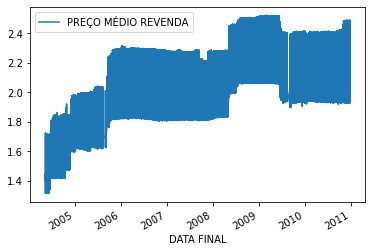

In [38]:
diesel_treino2.plot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA')

<ipython-input-39-d0bda4651796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_treino2['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino2.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)


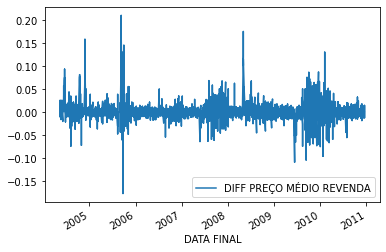

In [39]:
def target_diff(x):
    return x.diff().shift(-1)

diesel_treino2['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino2.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

diesel_treino2.plot(x='DATA FINAL', y='DIFF PREÇO MÉDIO REVENDA')

In [40]:
df_x_treino2['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_treino2.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_x_valid2['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_valid2.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

# 1- variáveis sazonais
Aqui, ao contrario do modeloanterior, vamos remover o dia da semana dos nosso dados,já que todos eles foram coletados no mesmo dia. DO mesmo modo iremos retirar o dia do ano, já que vimos no modelo anterior que ele esta causando overfiting na validação dos dados. Em contra partida, iremos adicionar uma nova variável ao datafram, que sera a semana do ano e ver se temo sum resultado melhor.

In [41]:
df_x_treino2['MES'] = diesel_treino2['DATA FINAL'].dt.month
df_x_treino2['DIA'] = diesel_treino2['DATA FINAL'].dt.day
df_x_treino2['DIA DO ANO'] = diesel_treino2['DATA FINAL'].dt.dayofyear
df_x_treino2['SEMANA DO ANO'] = diesel_treino2['DATA FINAL'].dt.weekofyear

df_x_valid2['MES'] = diesel_valid2['DATA FINAL'].dt.month
df_x_valid2['DIA'] = diesel_valid2['DATA FINAL'].dt.day
df_x_valid2['DIA DO ANO'] = diesel_valid2['DATA FINAL'].dt.dayofyear
df_x_treino2['SEMANA DO ANO'] = diesel_valid2['DATA FINAL'].dt.weekofyear

In [42]:
df_x_treino2.head(5)

,ESTADO,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA DO ANO,SEMANA DO ANO
43547,DISTRITO FEDERAL,0.013,5,15,136,NaN
43548,GOIAS,0.001,5,15,136,NaN
43549,MATO GROSSO,-0.003,5,15,136,NaN


# 2- LAG
Ao invez de usar apenas o LAG da ultima semana usarei o lAG das ultimas 12 semanas, de forma artitrária

In [43]:
for c in range(1,12):
    df_x_treino2['PREÇO MÉDIO REVENDA ATUAL {}'.format(c)] = diesel_treino['PREÇO MÉDIO REVENDA'].shift(c)
    df_x_valid2['PREÇO MÉDIO REVENDA ATUAL {}'.format(c)] = diesel_valid['PREÇO MÉDIO REVENDA'].shift(c)

# 3- DIFF_LAG
Faremos a mesma coisa aqui, então teremos o valor da semana atual para o valor da semana anterior, da semana atual para duas semanas atras, e assimpor diante

In [44]:
for c in range(1,12):
    df_x_treino2['DIFF PREÇO MÉDIO REVENDA ATUAL {}'.format(c)] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff(c)
    df_x_valid2['DIFF PREÇO MÉDIO REVENDA ATUAL {}'.format(c)] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff(c)

# 4 - MÉDIA MÓVEL
Faremos a mesma coisa com a média móvel, pegando diferentes espaços de tempo, variando desde dois  dias até 11 dias

In [45]:
for c in range(2,12):
    df_x_treino2['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_{}_SEMANAS'.format(c)] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(c).mean().reset_index(level=0, drop=True)
    df_x_valid2['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_{}_SEMANAS'.format(c)] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(c).mean().reset_index(level=0, drop=True)

In [46]:
df_x_treino2[df_x_treino2['ESTADO'] == 'SAO PAULO'].head(1)

,ESTADO,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA DO ANO,SEMANA DO ANO,PREÇO MÉDIO REVENDA ATUAL 1,PREÇO MÉDIO REVENDA ATUAL 2,PREÇO MÉDIO REVENDA ATUAL 3,PREÇO MÉDIO REVENDA ATUAL 4,PREÇO MÉDIO REVENDA ATUAL 5,PREÇO MÉDIO REVENDA ATUAL 6,PREÇO MÉDIO REVENDA ATUAL 7,PREÇO MÉDIO REVENDA ATUAL 8,PREÇO MÉDIO REVENDA ATUAL 9,PREÇO MÉDIO REVENDA ATUAL 10,PREÇO MÉDIO REVENDA ATUAL 11,DIFF PREÇO MÉDIO REVENDA ATUAL 1,DIFF PREÇO MÉDIO REVENDA ATUAL 2,DIFF PREÇO MÉDIO REVENDA ATUAL 3,DIFF PREÇO MÉDIO REVENDA ATUAL 4,DIFF PREÇO MÉDIO REVENDA ATUAL 5,DIFF PREÇO MÉDIO REVENDA ATUAL 6,DIFF PREÇO MÉDIO REVENDA ATUAL 7,DIFF PREÇO MÉDIO REVENDA ATUAL 8,DIFF PREÇO MÉDIO REVENDA ATUAL 9,DIFF PREÇO MÉDIO REVENDA ATUAL 10,DIFF PREÇO MÉDIO REVENDA ATUAL 11,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_2_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_3_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_5_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_6_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_7_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_8_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_9_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_10_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_11_SEMANAS
43570,SAO PAULO,0.0,5,15,136,NaN,1.37,1.359,1.425,1.45,1.593,1.552,1.476,1.52,1.504,1.723,1.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. ONE HOT ENCODER

Aqui acrescentaremos o Estado e região, utlizando a técnica de one hot encoder. E não se esqueça de dividir os valores de séries temporais que você tem (exemplo: cada estado tem uma série temporal. Para que o modelo possa prever melhor para cada estado criando colunas referentes a algum valor da série temporal

In [47]:
!pip install category_encoders

In [48]:
from category_encoders import OneHotEncoder

df_x_treino2['ESTADO'] = diesel_treino['ESTADO']
df_x_treino2['REGIÃO'] = diesel_treino['REGIÃO']

df_x_valid2['ESTADO'] = diesel_valid['ESTADO']
df_x_valid2['REGIÃO'] = diesel_valid['REGIÃO']

encoded_estado = OneHotEncoder(cols=['REGIÃO', 'ESTADO'], use_cat_names=True, drop_invariant=True)
df_x_treino2 = encoded_estado.fit_transform(df_x_treino2)
df_x_valid2 = encoded_estado.fit_transform(df_x_valid2)
df_x_treino2.head(5)

,ESTADO_DISTRITO FEDERAL,ESTADO_GOIAS,ESTADO_MATO GROSSO,ESTADO_MATO GROSSO DO SUL,ESTADO_ALAGOAS,ESTADO_BAHIA,ESTADO_CEARA,ESTADO_MARANHAO,ESTADO_PARAIBA,ESTADO_PERNAMBUCO,ESTADO_PIAUI,ESTADO_RIO GRANDE DO NORTE,ESTADO_SERGIPE,ESTADO_ACRE,ESTADO_AMAPA,ESTADO_AMAZONAS,ESTADO_PARA,ESTADO_RONDONIA,ESTADO_RORAIMA,ESTADO_TOCANTINS,ESTADO_ESPIRITO SANTO,ESTADO_MINAS GERAIS,ESTADO_RIO DE JANEIRO,ESTADO_SAO PAULO,ESTADO_PARANA,ESTADO_RIO GRANDE DO SUL,ESTADO_SANTA CATARINA,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA DO ANO,SEMANA DO ANO,PREÇO MÉDIO REVENDA ATUAL 1,PREÇO MÉDIO REVENDA ATUAL 2,PREÇO MÉDIO REVENDA ATUAL 3,PREÇO MÉDIO REVENDA ATUAL 4,PREÇO MÉDIO REVENDA ATUAL 5,PREÇO MÉDIO REVENDA ATUAL 6,PREÇO MÉDIO REVENDA ATUAL 7,PREÇO MÉDIO REVENDA ATUAL 8,PREÇO MÉDIO REVENDA ATUAL 9,PREÇO MÉDIO REVENDA ATUAL 10,PREÇO MÉDIO REVENDA ATUAL 11,DIFF PREÇO MÉDIO REVENDA ATUAL 1,DIFF PREÇO MÉDIO REVENDA ATUAL 2,DIFF PREÇO MÉDIO REVENDA ATUAL 3,DIFF PREÇO MÉDIO REVENDA ATUAL 4,DIFF PREÇO MÉDIO REVENDA ATUAL 5,DIFF PREÇO MÉDIO REVENDA ATUAL 6,DIFF PREÇO MÉDIO REVENDA ATUAL 7,DIFF PREÇO MÉDIO REVENDA ATUAL 8,DIFF PREÇO MÉDIO REVENDA ATUAL 9,DIFF PREÇO MÉDIO REVENDA ATUAL 10,DIFF PREÇO MÉDIO REVENDA ATUAL 11,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_2_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_3_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_5_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_6_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_7_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_8_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_9_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_10_SEMANAS,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_11_SEMANAS,REGIÃO_CENTRO OESTE,REGIÃO_NORDESTE,REGIÃO_NORTE,REGIÃO_SUDESTE,REGIÃO_SUL
43547,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.013,5,15,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
43548,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,5,15,136,NaN,1.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
43549,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.003,5,15,136,NaN,1.437,1.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
43550,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.002,5,15,136,NaN,1.600,1.437,1.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
43551,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.003,5,15,136,NaN,1.526,1.600,1.437,1.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0



# 2. PREÇOS EM OUTROS ESTADOS
E não se esqueça de dividir os valores de séries temporais que você tem (exemplo: cada estado tem uma série temporal. Para que o modelo possa prever melhor para cada estado criando colunas referentes a algum valor da série temporal)
Podemos então tratar cada estado como uma série temporal, então poderemos usar o preço de um estado para tentar prever o preço de outro

In [49]:
# usando então a função pivot do pandas, pegar-se uma coluna para usar
#como índice das linhas e uma coluna como índice de cada coluna
# e os valores que temos

In [50]:
df_x_treino2['DATA FINAL'] = diesel_treino['DATA FINAL']
df_x_valid2['DATA FINAL'] = diesel_valid['DATA FINAL']

preco_por_estado_treino = df_x_treino2.pivot(index='DATA FINAL', columns="ESTADO",values='DIFF PREÇO MÉDIO REVENDA ATUAL 1')
preco_por_estado_valid = df_x_valid2.pivot(index='DATA FINAL', columns="ESTADO",values='DIFF PREÇO MÉDIO REVENDA ATUAL 1')

preco_por_estado_treino += '_DPREÇO'
preco_por_estado_valid += '_DPREÇO'

df_x_treino2 = pd.merge(df_x_treino2, preco_por_estado_treino, how='left', on='DATA FINAL')
df_x_valid2 = pd.merge(df_x_valid2, preco_por_estado_valid, how='left', on='DATA FINAL')
df_x_treino2.tail()

KeyError: 'ESTADO'